In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("/content/diabetes.csv")

print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [6]:
print(df.isnull().sum())

print(df['Outcome'].value_counts())

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Outcome
0    500
1    268
Name: count, dtype: int64


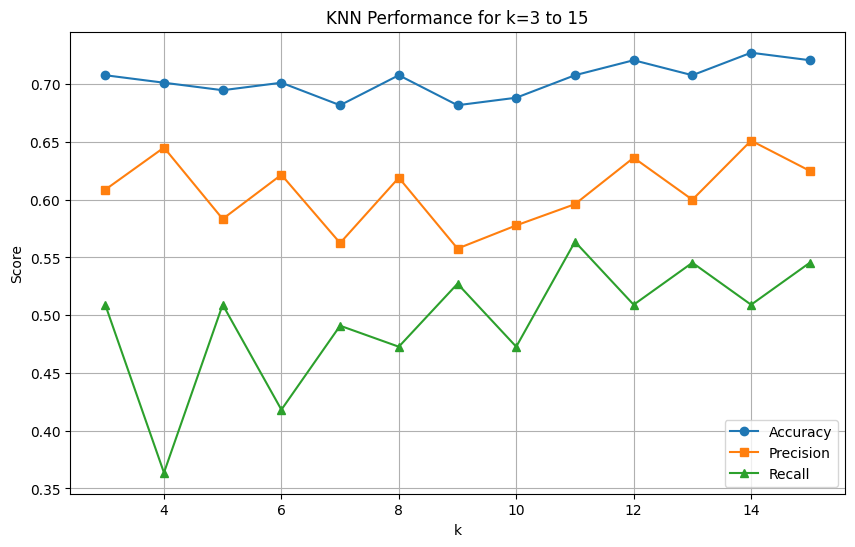

✅ بهترین مقدار k: 14


In [7]:
#  الگوریتم KNN با k بین 3 تا 15
k_values = range(3, 16)
acc_list, prec_list, rec_list = [], [], []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc_list.append(accuracy_score(y_test, y_pred))
    prec_list.append(precision_score(y_test, y_pred))
    rec_list.append(recall_score(y_test, y_pred))

plt.figure(figsize=(10,6))
plt.plot(k_values, acc_list, marker='o', label='Accuracy')
plt.plot(k_values, prec_list, marker='s', label='Precision')
plt.plot(k_values, rec_list, marker='^', label='Recall')
plt.title('KNN Performance for k=3 to 15')
plt.xlabel('k')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(acc_list)]
print(f"✅ بهترین مقدار k: {best_k}")


Decision Tree -> Accuracy: 0.747, Precision: 0.625, Recall: 0.727


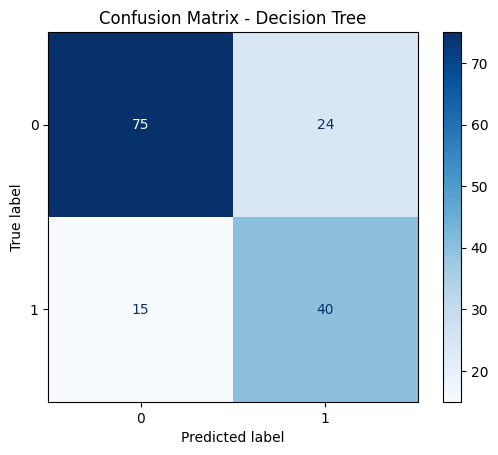

In [8]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)

print(f"Decision Tree -> Accuracy: {acc_dt:.3f}, Precision: {prec_dt:.3f}, Recall: {rec_dt:.3f}")

ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.show()


Random Forest -> Accuracy: 0.721, Precision: 0.607, Recall: 0.618


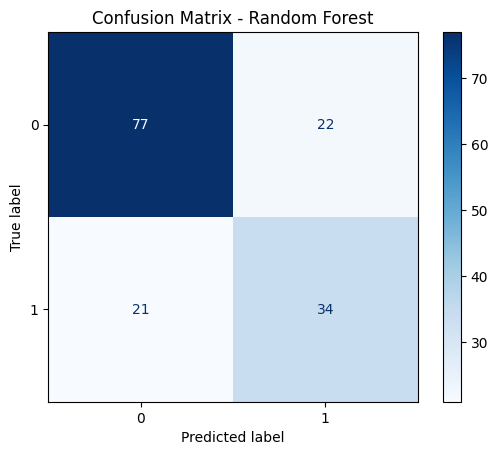

In [9]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)

print(f"Random Forest -> Accuracy: {acc_rf:.3f}, Precision: {prec_rf:.3f}, Recall: {rec_rf:.3f}")

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()


SVM -> Accuracy: 0.734, Precision: 0.646, Recall: 0.564


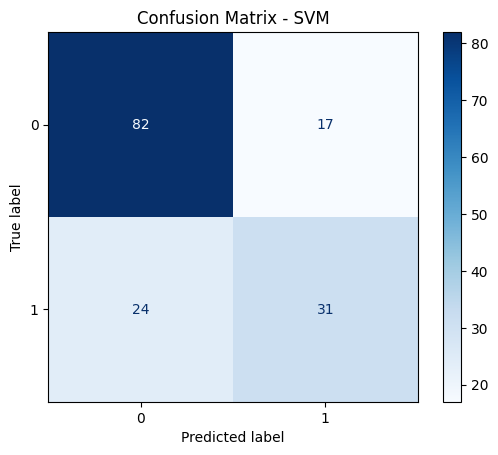

In [10]:
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm)
rec_svm = recall_score(y_test, y_pred_svm)

print(f"SVM -> Accuracy: {acc_svm:.3f}, Precision: {prec_svm:.3f}, Recall: {rec_svm:.3f}")

ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.show()


In [11]:
results = pd.DataFrame({
    'Model': ['KNN (best k)', 'Decision Tree', 'Random Forest', 'SVM'],
    'Accuracy': [max(acc_list), acc_dt, acc_rf, acc_svm],
    'Precision': [prec_list[np.argmax(acc_list)], prec_dt, prec_rf, prec_svm],
    'Recall': [rec_list[np.argmax(acc_list)], rec_dt, rec_rf, rec_svm]
})

print("\n📊 مقایسه نهایی الگوریتم‌ها:")
print(results)



📊 مقایسه نهایی الگوریتم‌ها:
           Model  Accuracy  Precision    Recall
0   KNN (best k)  0.727273   0.651163  0.509091
1  Decision Tree  0.746753   0.625000  0.727273
2  Random Forest  0.720779   0.607143  0.618182
3            SVM  0.733766   0.645833  0.563636
